# Foraging Robot Exercise #

In this individual exercise, you will write heuristics for a foraging robot so that it can efficiently gather fruits and berries in the forest. Your goal is to collect as much as you can!

### Learning goals ###

Refresh your knowledge of semester 2 statistics:

* Probability
* Probability distributions
* Conditional probabilities

### Overview ###

As for all individual exercises, you are expected to complete the bronze level, but silver and gold levels are fully optional.

Bronze Level (~1 hour)
* Introduction to the scenario
* Estimate distributions from samples
* Calculate cumulative distribution functions

Silver Level (~1 hour)
* Conditional probabilities

Gold Level (~2.5 hours)
* Making a strategy

In [89]:
# Imports
from IPython.display import Image
import numpy as np
import seaborn as sns

from tests import tests

# Bronze medal: Your foraging robot #

Congratulations on acquiring your own ForageBot 3000. This robot can autonomously collect fruits and berries from your local forest. Let's import and initialize our robot:

In [90]:
from scenario.forage_bot import ForageBot, Tree, BerryBush

forageBot = ForageBot()

In the step above, we import the ForageBot class from a different file (module). We then initialize an instance of this class as forageBot. You have probably used classes before, such as DataFrames from the pandas module. All the methods (functions) and attributes (variables) of ForageBot() will be explained when we first use them, but if you want to have a look, you can also check out the scenario file to see the class definition.

The most important ability of your ForageBot, of course, is to forage. Every day, you can send out your robot to forage from one location. During our initital survey of your local forest, we identified two nearby apple trees. Let's send your new robot to one of these trees to collect apples.

In [91]:
tree_one = ForageBot.pre_survey['tree_one']

forageBot.forage(tree_one, verbose=True);

The robot collected 3.18kg of apples


Well done! You've collected your first apples. Now, try running the cell above a few more times. You will notice, that the amount of apples you collect changes every time. Even though you are collecting from the same tree, the yield for the day is random. Now, try collecting apples from the second tree a few times:

In [92]:
tree_two = ForageBot.pre_survey['tree_two']
#np.random.seed(42)
forageBot.forage(tree_two, verbose=True);

The robot collected 3.66kg of apples


Did you notice a difference? The second tree seems to usually yield more apples. However, it's sometimes possible to collect more apples from tree one than from tree two.

Later, we will go explore the forest and find new trees. Of course, we would like to find the best trees which yield us the most apples. Given that the amount of apples for any day is random, we should try to find the expected result from any given tree. The easiest way to do this, would be to estimate the average amount of apples we collect from any tree. Try below to calculate the mean amount of apples collected from a tree. It's as simple as summing up all the values you collected, and then dividing by the number of samples that you collected.

Complete the function below by filling in the '...'

In [93]:
def mean_tree_yield(tree, iterations=100) -> float:
    """ Collects from a tree multiple times, and then returns the mean yield.

    Args:
        tree: Reference to the tree which we forage (sample) from.
        iterations: The number of samples to collect.
    """
    # Create an empty list of samples
    samples = []
    
    # Collect one new sample from the given tree in each iteration using the forage() function of our bot.
    for i in range(iterations):
        samples.append(forageBot.forage(tree))
        
    # Calculate and return the mean
    return sum(samples) / iterations

mean_result = mean_tree_yield(tree_two)
print(f'After 100 iterations, the mean yield from this tree was: {mean_result:.02f}kg')

# This function is graded. You can uncomment the line below to test whether your function passes.
tests.Test_MeanTreeYield(mean_tree_yield);

After 100 iterations, the mean yield from this tree was: 5.19kg
All tests passed


If you rerun the cell above, you will notice that the mean yield still changes every time, since we are only estimating it from 100 samples. Nevertheless, our estimate is now much more consistent than any single sample was.

While the mean is often a useful metric, we might get an even better idea of what each apple tree yields if we plot the distribution of apples. Complete the code below to do just that.

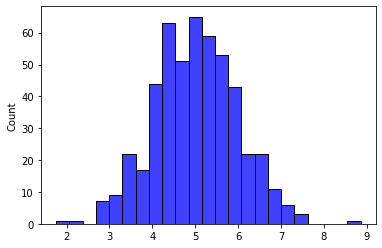

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(samples, color='blue') -> None:
    """ Plots the distribution of collected samples.

    Args:
        samples: A list of samples from a distribution.
        color: Name of the color in which to draw the distribution.
    """
    sns.histplot(samples, color=color, kde=False)  
    plt.ylabel('Count')  # Set the y-axis label
    plt.show()  

    return None

# Set random seed so output matches the expected output
np.random.seed(42)

# Collect from a tree 500 times
samples = [forageBot.forage(tree_two) for i in range(500)]
plot_distribution(samples)


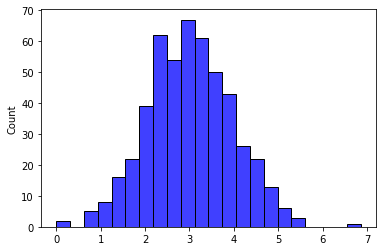

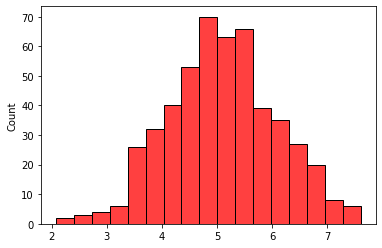

In [95]:
# Set random seed so output matches the expected output
np.random.seed(42)

# Collect from both trees
samples_one = [forageBot.forage(tree_one) for i in range(500)]
samples_two = [forageBot.forage(tree_two) for i in range(500)]

# Plot distributions
plot_distribution(samples_one, color='blue')
plot_distribution(samples_two, color='red')

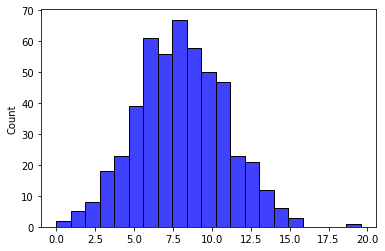

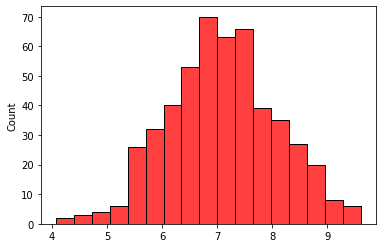

In [96]:
tree_three = ForageBot.pre_survey['tree_three']
tree_four = ForageBot.pre_survey['tree_four']

# Set random seed so output matches the expected output
np.random.seed(42)

# Collect from both trees
samples_three = [forageBot.forage(tree_three) for i in range(500)]
samples_four = [forageBot.forage(tree_four) for i in range(500)]

# Plot distributions
plot_distribution(samples_three, color='blue')
plot_distribution(samples_four, color='red')

Although both of these apple trees seem to also be normally distributed, tree three has a much higher variance.

If you run our mean_tree_yield() function, you will find that tree three (blue distribution) has a higher mean yield.

But let's say you need 5kg of apples today. Can you calculate which of the two trees (tree_three and tree_four) is most likely to yield you at least 5kg on any given day?

Don't remember how to calculate a probability from a distribution? Check out this: https://mathworld.wolfram.com/DistributionFunction.html

You will need to do two things:

Estimate the parameters of the distribution for each tree from the samples you collected. (You can use scipy.stats.norm)
Calculate the probability for each tree to yield at least 5kg (You will want to use the cumulative distribution function for this)
The commonly used Python packages all have pretty decent online documentation. Don't intrinsically know how to use scipy.stats.norm? Nobody does. Check this: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [97]:
from scipy.stats import norm

# Use the same samples we collected above to make sure your answer matches ours.
np.random.seed(42)
samples_three = [forageBot.forage(tree_three) for i in range(500)]
samples_four = [forageBot.forage(tree_four) for i in range(500)]

# Estimating the parameters: mean and standard deviation & fitting it to normal distribution
mu_tree_three, std_tree_three = norm.fit(samples_three)
mu_tree_four, std_tree_four = norm.fit(samples_four)

# Calculating the prability for both trees to yield at least 5kg
prob_tree_three = 1 - norm.cdf(5, loc=mu_tree_three, scale=std_tree_three) # 1 - less/equal to 5kg = prob greater than 5kg
prob_tree_four = 1 - norm.cdf(5, loc=mu_tree_four, scale=std_tree_four)

# Assign the probability that tree three yields more than 5kg of apples on any given day to ANSWER_PROB_TREE_THREE
ANSWER_PROB_TREE_THREE = prob_tree_three
# Assign the probability that tree four yields more than 5kg of apples on any given day to ANSWER_PROB_TREE_FOUR
ANSWER_PROB_TREE_FOUR = prob_tree_four

tests.Test_ExerciseTwo(ANSWER_PROB_TREE_THREE=ANSWER_PROB_TREE_THREE, ANSWER_PROB_TREE_FOUR=ANSWER_PROB_TREE_FOUR);

All tests passed


Now that we have figured out how to evaluate trees, let's explore a little and find some new ones. Your forage bot can also explore to find new foragable things in the forest. Run the function explore() a few times and see what you get.

In [98]:
discovery = forageBot.explore()
print(discovery)

The output you get might not be the most clear. <scenario.forage_bot.Tree object at 0x000002978E34B7D0> simply means that the function explore() returned an object of class Tree from the scenario.forage_bot module. <scenario.forage_bot.BerryBush object at 0x000001ECEFC7B040> is a different class, BerryBush, from the same module. Apparently, explore can return one of two different return types.

So, as you can see, your robot will find new trees and berry bushes when exploring.

## Bronze medal: Your foraging robot ##

Your final task for the bronze medal is to find a tree that will yield more than 8kg of apples on more than 75% of days. Use the explore function together with the functions you have created so far!

Note: Trees have some attributes which of course you could theoretically look up directly by checking the scenario files, instead of estimating them from samples. But a solution which is based on this will NOT be accepted.

Since the explore() method can result in both Tree or BerryBush, you will need to check whether you found a Tree. There are several ways in which this can be done, on of which is the built-in isinstance() function.

In [99]:
class Tree:
     # Initializing the Tree instance with mean and std values
    def __init__(self, mean, std):
        self.mean = mean # mean value for tree's yield
        self.std = std # std fpr the tree's yield

    def forage(self):
        # Stimulating foraging from the tree
        return "Apple", 0.5 

    def harvest(self):
        # Stimulating harvest logic from the tree
        return 10

def explore():
    # Define variables for generating a new tree with specific mean and std 
    mean = 10  # Define mean value 
    std = 5   # Define standard deviation value 
    new_tree = Tree(mean=mean, std=std)  # Create a new tree instance 
    return new_tree

# Set seed to solution
np.random.seed(42)

# Search for new tree that fulfills the requirement (more than 8kg apples & 75% of days)
for _ in range(1000):
    plant = explore()
    if isinstance(plant, Tree):
        weights = [plant.harvest() for _ in range(100)]
        if sum(w > 8 for w in weights) >= 75:
            BRONZE_MEDAL_TREE = plant
            
            break

tests.Test_ExerciseThree(BRONZE_MEDAL_TREE=BRONZE_MEDAL_TREE)


All tests passed
